In [1]:
import yaml
import pandas as pd
from functools import partial
from typing import Callable

%matplotlib inline

In [3]:
class Character:
    def __init__(
        self,
        name,
        speed,
        max_energy=100,
        energy=50,
        basic=None,
        skill=None,
        ultimate=None,
    ):
        self.name = name
        self.action_gauge = 10_000
        self.base_speed = speed
        self.current_speed = self.base_speed
        self.history = []
        self.max_energy = max_energy
        self.energy = energy
        self.buffs = {}
        self.basic = basic
        self.skill = skill
        self.ultimate = ultimate
        self.auto = True
        self.basic_target = self
        self.skill_target: Character = None
        self.agent = []
        self.agent_count = 0
        self.action_count = 0

    def setActionSeq(self, seq):
        self.auto = False
        self.agent = seq

    def setSkillTarget(self, target):
        self.skill_target = target

    def setBasicTarget(self, target):
        self.basic_target = target

    def setUltimateTarget(self, target):
        pass

    def setSpeed(self, speed):
        self.base_speed = speed
        self.current_speed = speed

        # Recalculate speed buffs

    def advance(self, percent):
        self.action_gauge -= (percent / 100) * 10_000

    def delay(self, percent):
        self.action_gauge += (percent / 100) * 10_000

    def add_buff(self, buff: Buff):
        buff.apply()
        self.buffs.append(buff)

    def reset(self):
        pass

    def tick(self):
        # Check the order in which action_gauge is reset

        if self.action_gauge <= 0:
            self.history.append(0)
            self.action_count += 1
            self.action_gauge = 10_000

            # if self.buffs:
            #     for id_, b in self.buffs.items():
            #         b.turns -= 1
            #         # Do Stuff

            if self.auto == True:
                self.skill(self.skill_target)
            else:
                if self.agent[self.agent_count] == "basic":
                    self.basic(self.basic_target)
                elif self.agent[self.agent_count] == "skill":
                    self.skill(self.skill_target)
                self.agent_count = (self.agent_count + 1) % len(self.agent)

        else:
            self.history.append(self.action_gauge)
            self.action_gauge -= self.current_speed

        # self.action_gauge -= self.current_speed


class Buff(object):
    def __init__(self, target, turns):
        self.target = target
        self.turns = turns

    def apply(self):
        raise NotImplementedError

    def remove(self):
        raise NotImplementedError


class SpeedBuff(Buff):
    def __init__(self, target: Character, turns, flat=None, percent=None):
        super.__init__(target, turns)
        self.flat = flat
        self.percent_flat = self.target.base_speed * (1 + percent / 100)
        self.turns = turns
        self.target = target

    def apply(self):
        if self.percent is not None:
            self.target.current_speed += self.percent_flat
        if self.flat is not None:
            self.target.current_speed += self.flat

    def remove(self):
        if self.percent is not None:
            self.target.current_speed -= self.percent_flat
        elif self.flat is not None:
            self.target.current_speed -= self.flat


class Basic(object):
    def __init__(self, energy):
        self.energy = energy


class Skill(object):
    def __init__(
        self, target: Character = None, effect: Callable = None, energy: int = 30
    ):
        self.target = target
        self.effect = effect
        self.energy = energy

    def setTarget(self, target: Character):
        self.target = target

    def activate(self):
        self.effect(self.target)


class Action(object):
    def __init__(self, speed_flat, speed_percent, energy, target: Character = None):
        pass


class Manager:
    def __init__(self):
        char_path = "characters.yml"
        skills_path = "skills.yml"
        self.characters = {}

        with open("characters.yml", "r") as f:
            chars_config = yaml.safe_load(f)

        with open("skills.yml", "r") as f:
            skills_config = yaml.safe_load(f)

        for c, config in chars_config.items():
            character_obj = Character(name=c, **config)

            # try:
            character_obj.basic = make_basic(skills_config[c]["basic"])
            character_obj.skill = make_skill(skills_config[c]["skill"])
            # except KeyError:
            # print("Skills not found")
            # continue
            self.characters[c] = character_obj

    def get_chars(self, *names) -> dict:
        return {
            name: self.characters[name]
            for name in names
            if self.characters.get(name, None) is not None
        }

    def c(self, name) -> Character:
        return self.characters.get(name)


def advance(target: Character, percent: float):
    return target.advance(percent)


def delay(target: Character, percent: float):
    return lambda: target.delay(percent)


def make_basic(d: dict):
    if d["effect"]:
        for name, amount in d["effect"].items():
            if name == "advance":
                return partial(advance, percent=amount)
    else:
        return lambda x: None


def make_skill(d: dict):
    if d["effect"]:
        for name, amount in d["effect"].items():
            if name == "advance":
                return partial(advance, percent=amount)
    else:
        return lambda x: None


def make_speed_buff():
    pass


# class Effect(object):
#     def __init__(self, **kwargs):
#         config = kwargs
#         self.target = None
#         self.

#     def activate():
#         self.do(self)


# def speedbuff():
#     buff = SpeedBuff(target: Character, turns, flat=None, percent=None):

NameError: name 'Buff' is not defined

In [10]:
import yaml
import pandas as pd


from dataclasses import dataclass


from functools import partial
from typing import Callable


@dataclass
class Character:
    """Character object"""

    name: str
    baseSpeed: float
    maxEnergy: int
    energy: float
    action_gauge: int = 10_000
    buffs: list[Buff]

    def __post_init__(self):
        self.currentSpeed = self.baseSpeed
        self.history = []
        self.buffs = {}
        self.basic = None
        self.skill = None
        self.ultimate = None

        self.auto = True
        self.basicTarget = self
        self.skillTarget: Character = None
        self.agent = []
        self.agentCount = 0
        self.turnCount = 0

    def setActionSeq(self, seq: list[str]):
        self.auto = False
        self.agent = seq

    def setSkillTarget(self, target: Character):
        self.skillTarget = target

    def setBasicTarget(self, target: Character):
        self.basicTarget = target

    def setUltimateTarget(self, target: Character | list[Character]):
        pass

    def setSpeed(self, speed):
        self.base_speed = speed
        self.current_speed = speed

        # Recalculate speed buffs

    def advance(self, percent):
        self.action_gauge -= (percent / 100) * 10_000

    def delay(self, percent):
        self.action_gauge += (percent / 100) * 10_000

    # def add_buff(self, buff: Buff):
    #     buff.apply()
    #     self.buffs.append(buff)

    def reset(self):
        pass

    def tick(self):
        # Check the order in which action_gauge is reset

        if self.action_gauge <= 0:
            self.history.append(0)
            self.turnCount += 1
            self.action_gauge = 10_000

            # if self.buffs:
            #     for id_, b in self.buffs.items():
            #         b.turns -= 1
            #         # Do Stuff

            if self.auto == True:
                self.skill(self.skillTarget)
            else:
                if self.agent[self.agentCount] == "basic":
                    self.basic(self.basicTarget)
                elif self.agent[self.agentCount] == "skill":
                    self.skill(self.skillTarget)
                self.agentCount = (self.agentCount + 1) % len(self.agent)

        else:
            self.history.append(self.action_gauge)
            self.action_gauge -= self.current_speed

        # self.action_gauge -= self.current_speed


class CharacterManager:
    def __init__(self):
        char_path = "characters.yml"
        skills_path = "skills.yml"
        self.characters = {}

        with open(char_path, "r") as f:
            chars_config = yaml.safe_load(f)

        with open(skills_path, "r") as f:
            skills_config = yaml.safe_load(f)

        for c, config in chars_config.items():
            character_obj = Character(name=c, **config)

            try:
                character_obj.basic = make_basic(skills_config[c]["basic"])
                character_obj.skill = make_skill(skills_config[c]["skill"])
            except KeyError:
                print("Skills not found")
                continue
            self.characters[c] = character_obj

    def get_chars(self, *names) -> dict:
        return {
            name: self.characters[name]
            for name in names
            if self.characters.get(name, None) is not None
        }

    def c(self, name) -> Character:
        return self.characters.get(name)


def make_basic(d: dict):
    if d["effect"]:
        for name, amount in d["effect"].items():
            if name == "advance":
                return partial(advance, percent=amount)
    else:
        return lambda x: None


def make_skill(d: dict):
    if d["effect"]:
        for name, amount in d["effect"].items():
            if name == "advance":
                return partial(advance, percent=amount)
    else:
        return lambda x: None


def make_speed_buff():
    pass


# m = CharacterManager()
# m.c("Bronya").setSkillTarget(m.c("Sushang"))
# m.c("Bronya").setActionSeq(["basic", "skill"])
# m.c("Sushang").setSpeed(134)
# sim1 = Sim(m.get_chars("Bronya", "Sushang"))
# # Make sim without buffs
# sim1.run(750)
# m.c("Bronya").action_count


# class Effect(object):
#     def __init__(self, **kwargs):
#         config = kwargs
#         self.target = None
#         self.

#     def activate():
#         self.do(self)


# def speedbuff():
#     buff = SpeedBuff(target: Character, turns, flat=None, percent=None):


def advance(target: Character, percent: float):
    return target.advance(percent)


def delay(target: Character, percent: float):
    return lambda: target.delay(percent)

NameError: name 'Character' is not defined

In [ ]:
class Sim:
    def __init__(self, characters: dict):
        self.characters = characters
        self.char_list = list(characters.values())

    def tick(self):
        for c in sorted(self.char_list, key=lambda x: x.action_gauge):
            c.tick()

    def run(self, units, turns=0):
        for i in range(units):
            self.tick()

    def plot(self, *chars):
        if not len(chars):
            data = {name: c.history for name, c in self.characters.items()}
        else:
            data = {name: self.characters[name].history for name in chars}
        df = pd.DataFrame(data)
        df.plot.line(figsize=(15, 2))

In [2]:
m = Manager()
m.c("Bronya").setSkillTarget(m.c("Sushang"))
m.c("Bronya").setActionSeq(["basic", "skill"])
m.c("Sushang").setSpeed(150)
sim1 = Sim(m.get_chars("Bronya", "Sushang"))

sim1.run(750)
print(m.c("Bronya").action_count)

NameError: name 'Manager' is not defined

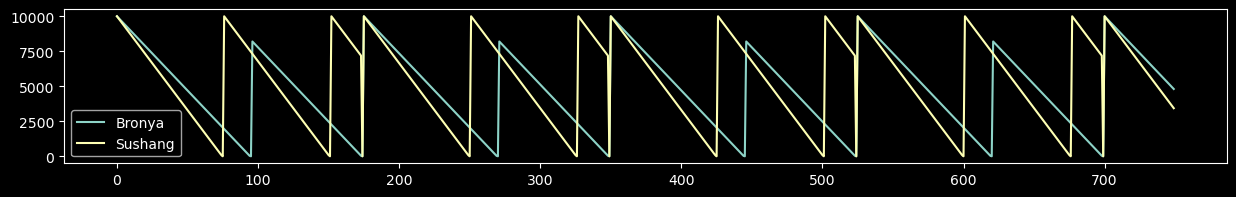

In [ ]:
sim1.plot()

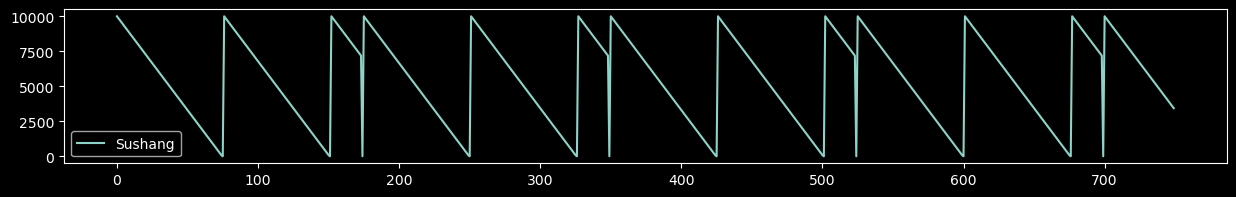

In [ ]:
sim1.plot("Sushang")

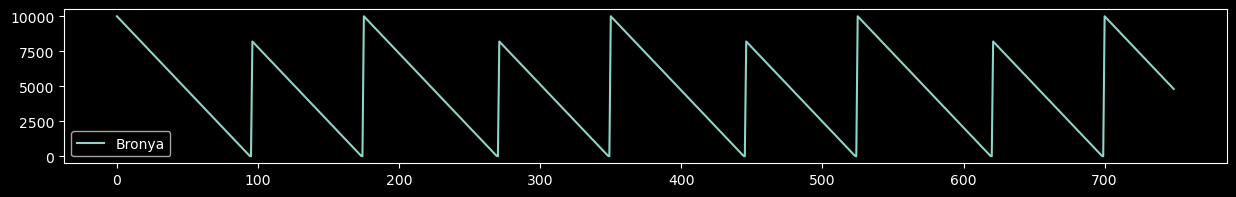

In [ ]:
sim1.plot("Bronya")

In [17]:
# Streamlit -> 4 slots, drop down for speed, energy,
# Add sequence of buffs
# Toggle characters in graph
# have an action count shown
# draft the layout, upload to git

In [101]:
action_counts = []
start_speed = 100

for speed in range(start_speed, 200, 1):
    m = Manager()
    m.c("Bronya").setSkillTarget(m.c("Serval"))
    m.c("Bronya").setActionSeq(["skill", "basic"])
    m.c("Serval").setSpeed(speed)
    sim1 = Sim(m.get_chars("Bronya", "Serval"))
    sim1.run(750)
    action_counts.append((speed, m.c("Serval").action_count))

<AxesSubplot:title={'center':'Actions for Serval in 10 MoC Turns. Bronya 105 speed, skill+basic rotation'}, xlabel='speed'>

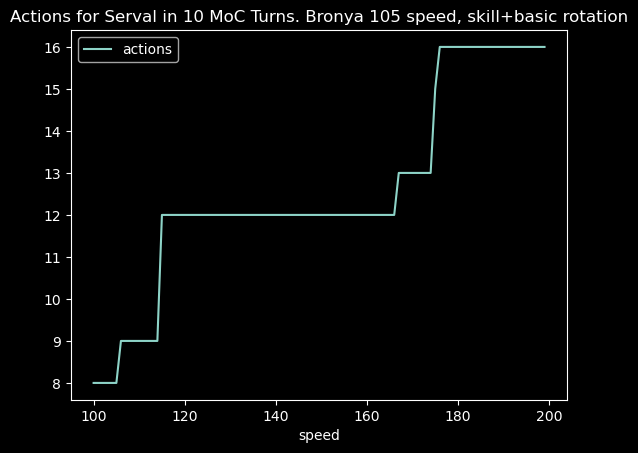

In [106]:
# Speed vs Actions Panel, Specify Number of Units or Turns


x = [x for x, y in action_counts]
y = [y for x, y in action_counts]
df2 = pd.DataFrame(
    {
        "speed": x,
        "actions": y,
    }
)
df2.plot.line(
    "speed",
    "actions",
    title="Actions for Serval in 10 MoC Turns. Bronya 105 speed, skill+basic rotation",
)

In [81]:
def speed_compare(speed):
    m = Manager()
    m.c("Bronya").setSkillTarget(m.c("Serval"))
    m.c("Bronya").setActionSeq(["skill", "skill"])
    m.c("Serval").setSpeed(speed)
    sim1 = Sim(m.get_chars("Bronya", "Serval"))
    sim1.run(750)
    print(m.c("Serval").action_count)
    return sim1

14


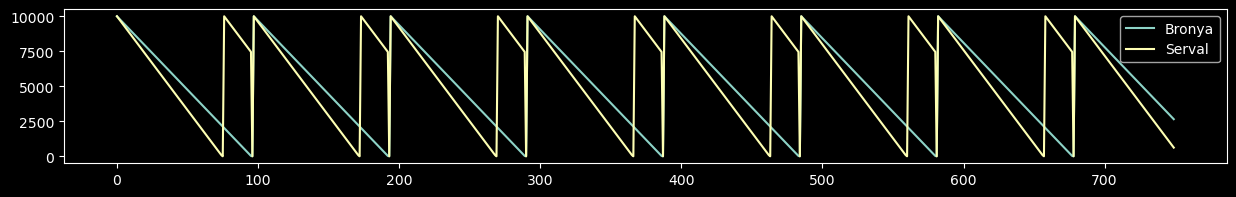

In [85]:
sim_speed = speed_compare(134)
sim_speed.plot()

In [26]:
m.c("Sushang").current_speed

148

8

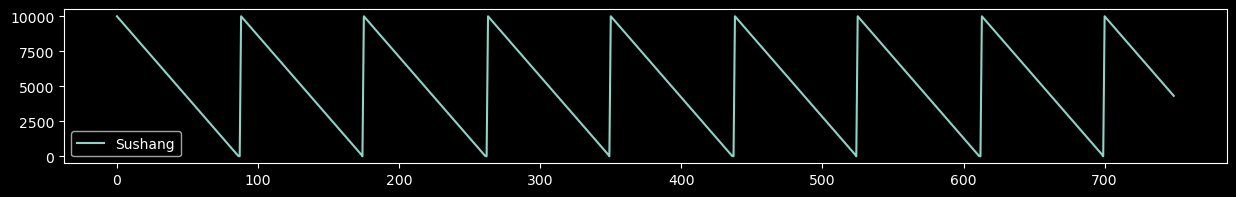

In [47]:
m = Manager()
m.c("Bronya").setSkillTarget(m.c("Sushang"))
m.c("Bronya").setActionSeq(["basic", "skill"])
m.c("Sushang").setSpeed(116)
sim1 = Sim(m.get_chars("Bronya", "Sushang"))
sim1.run(750)
sim1.plot("Sushang")
m.c("Sushang").action_count

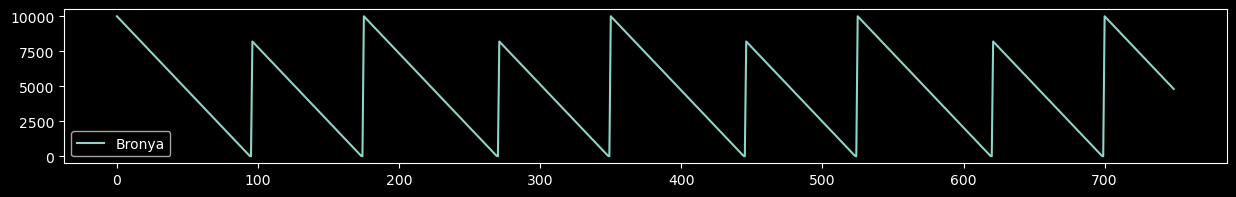

In [48]:
sim1.plot("Bronya")

None


16

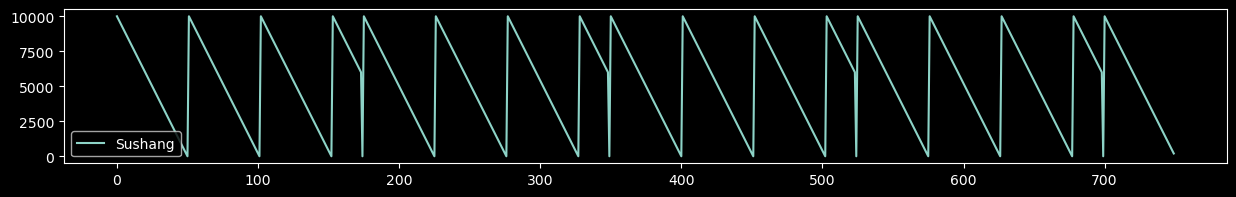

In [49]:
m = Manager()
m.c("Bronya").setSkillTarget(m.c("Sushang"))
m.c("Bronya").setActionSeq(["basic", "skill"])
print(m.c("Sushang").setSpeed(200))
sim1 = Sim(m.get_chars("Bronya", "Sushang"))
sim1.run(750)
sim1.plot("Sushang")
m.c("Sushang").action_count

In [37]:
m.c("Sushang").base_speed

200

In [3]:
def test(*name):
    print(name[0])

In [4]:
test("one")

one


In [9]:
from itertools import chain
from builder import CharacterManager
from sim import Sim
import pandas as pd

charactersDB = CharacterManager()
charactersDB("Bronya").setSkillTarget(charactersDB("Serval"))
chars = charactersDB.get_names()

In [27]:
n1, n2, n3, n4 = "Sushang", "Bronya", "Serval", "Tingyun"

c = charactersDB.get(n1, n2, n3, n4)
sim = Sim(c)
sim.run(750)
data = list(chain(*[[(i, name, x) for i, x in enumerate(char.history)] for name, char in sim.characters.items()]))

df = pd.DataFrame.from_records(
    data, columns=["Action Value", "Character", "Action Gauge"]
)

In [28]:
df

,Action Value,Character,Action Gauge
0,0,Sushang,10000
1,1,Sushang,9893
2,2,Sushang,9786
3,3,Sushang,9679
4,4,Sushang,9572
...,...,...,...
23995,5995,Tingyun,1040
23996,5996,Tingyun,928
23997,5997,Tingyun,816
23998,5998,Tingyun,704
